# Brandon L Morrow

# Problem 1 - Feature Ranking Methods (FLDR, Decision Tree Classification)<br>
1. Using the MNIST dataset, rank the features using Fisher’s Linear Discriminant Ratio as the criteria (you may utilize your implementation from the previous assignment).
2. For part 2, you will create and fit a decision tree classifier (using the scikit learn built in function) offering a new avenue for feature ranking.<br>
    (a) Create an algorithm that will accept your dataset and fit a decision tree classifier
to it. <br>
(b) Using your algorithm in part 2.1, run a 5 fold cross validation and score the
model based on its ability to classify accurately.<br>
(c) From the model you fit, extract the feature importances.<br>
(d) Add unit testing for the feature ranking in both methods.<br>
(e) Plot your decision tree graph and examine the key parameters displayed. Offer
an analysis for how the decision tree runs its predict method along with an analysis of the
runtime complexity.<br>
(f) Compare the features importances from the decision tree classifier with the feature
ranking using FLDR. Consider what sets the two methods apart and offer a discussion on
the benefits of each approach.

In [17]:
## We will rank the features of the MNIST dataset using Fisher Linear Discriminant Ratio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
mnist_df = pd.read_csv("MNIST.csv")

# Import and validate the imported data 
print(f"Shape of the Dataframe: {mnist_df.shape}")
print(f"Head:")
display(mnist_df.head())
print(f"Tail:")
display(mnist_df.tail())

Shape of the Dataframe: (42000, 785)
Head:


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Tail:


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# We Will first create a function to calculate the FLDR for each feature comparison
def feature_comparison_fldr(dataframe, class_column_index):
    
    groups = dataframe.groupby(class_column_index)
    n_groups = groups.ngroups
    n_features = dataframe.shape[1] - 1
    col_means, col_var = groups.mean(), groups.var() # Get 60 columns/features means and variance
    fdr_matrix = np.zeros((n_features, int(n_groups*(n_groups-1)/2))) # Initialize matrix to store FDR values
    column_names = [] # Create list for column names
    
    k = 0 # Math
    for i in range(n_groups):
        for j in range(i+1, n_groups):
            mean_dif = col_means.iloc[i,:] - col_means.iloc[j,:]
            numerator = mean_dif**2
            denominator = col_var.iloc[i,:] + col_var.iloc[j,:] + 1e-7 # Adjust for float point
            fdr = numerator / denominator
            fdr_matrix[:, k] = fdr
            column_names.append(f'({col_means.columns[i]},{col_means.columns[j]})') # This will display the featrures names on top
            k += 1
    # Create dataframe with FDR values and column names
    fdr_df = pd.DataFrame(fdr_matrix, columns=column_names)
    return fdr_df
    
fdr_df = feature_comparison_fldr(mnist_df, 'label')
print(f'FLDR Output Shape: {fdr_df.shape}')
display(fdr_df)

FLDR Output Shape: (784, 45)


,"(pixel0,pixel1)","(pixel0,pixel2)","(pixel0,pixel3)","(pixel0,pixel4)","(pixel0,pixel5)","(pixel0,pixel6)","(pixel0,pixel7)","(pixel0,pixel8)","(pixel0,pixel9)","(pixel1,pixel2)",...,"(pixel5,pixel6)","(pixel5,pixel7)","(pixel5,pixel8)","(pixel5,pixel9)","(pixel6,pixel7)","(pixel6,pixel8)","(pixel6,pixel9)","(pixel7,pixel8)","(pixel7,pixel9)","(pixel8,pixel9)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0.0,0.0,0.0,0.0,0.0,0.0,0.000454,0.0,0.0,0.0,...,0.0,0.000454,0.0,0.0,0.000454,0.0,0.0,0.000454,0.000454,0.0
780,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
781,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
782,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


In [19]:
# Now we will calculate the FLDA and rank each feature based on its score
def rank_feature_fldr(dataframe, class_column_index):
    groups = dataframe.groupby(class_column_index)
    n_groups = groups.ngroups
    n_features = dataframe.shape[1] - 1
    col_means, col_var = groups.mean(), groups.var()
    fdr_matrix = np.zeros((n_features, int(n_groups * (n_groups - 1) / 2)))
    column_names = []

    k = 0
    for i in range(n_groups):
        for j in range(i + 1, n_groups):
            mean_dif = col_means.iloc[i, :] - col_means.iloc[j, :]
            numerator = mean_dif ** 2
            denominator = col_var.iloc[i, :] + col_var.iloc[j, :] + 1e-10 # The 1e-10 is added to avoid division by zero
            fdr = numerator / denominator
            fdr_matrix[:, k] = fdr
            column_names.append(f'({col_means.columns[i]},{col_means.columns[j]})')
            k += 1

    fdr_df = pd.DataFrame(fdr_matrix, columns=column_names)
    average_fdr = fdr_df.mean(axis=1) # Compute the average FDR for each feature
    sorted_features = average_fdr.sort_values(ascending=False)
    
    return sorted_features

ranked_features_df = rank_feature_fldr(mnist_df, 'label')
display(ranked_features_df.head(20))

406    1.619782
434    1.449687
378    1.386104
350    0.992946
433    0.897859
462    0.893507
409    0.882876
461    0.873374
405    0.779696
437    0.766129
489    0.746681
436    0.746238
381    0.687322
351    0.685433
377    0.683459
379    0.681190
597    0.657605
542    0.654889
408    0.654405
407    0.650710
dtype: float64

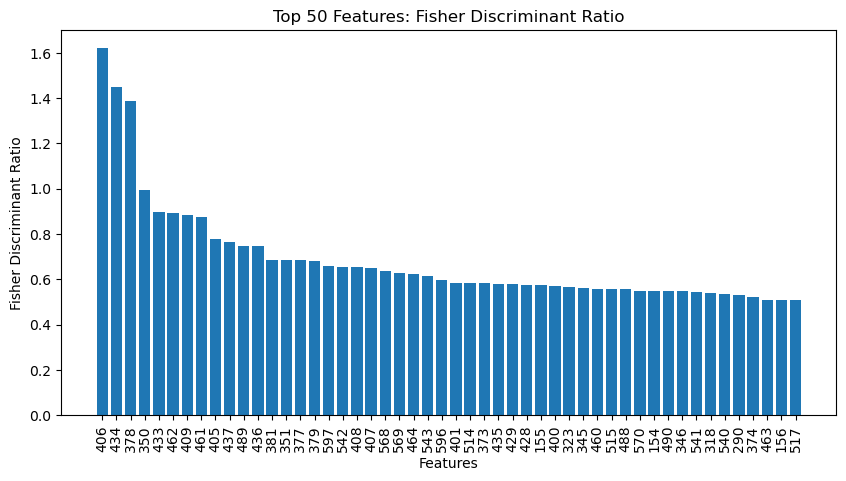

In [20]:
# Plot the top 30 features
n_features = 50
top_features = ranked_features_df.head(n_features).index
top_FLDR_values = ranked_features_df.head(n_features).values

plt.figure(figsize=(10, 5))  # Adjust the figure size to avoid overcrowding
plt.bar(range(n_features), top_FLDR_values)
plt.xticks(range(n_features), top_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Fisher Discriminant Ratio')
plt.title('Top 50 Features: Fisher Discriminant Ratio')
plt.show()

2.<b> For part 2, you will create and fit a decision tree classifier (using the scikit learn built in function) offering a new avenue for feature ranking.<br>
    (a) Create an algorithm that will accept your dataset and fit a decision tree classifier
to it. <br>(b) Using your algorithm in part 2.1, run a 5 fold cross validation and score the
model based on its ability to classify accurately.<br>

In [21]:
## Type the response for part 2 (Decision Tree) here ##
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Prepare the dataframe
labels = mnist_df['label']
mnist_features = mnist_df.drop(columns=['label'])

# Now create the decision tree and fit/perform the five fold cross evaluation
# I did not necessarily need to build functions, but I did in case I make a decision tree class in the future.
def fit_dec_tree(dataframe, target_lab):
    dec_tree_classifier = DecisionTreeClassifier(random_state=42)
    dec_tree_classifier.fit(dataframe, target_lab) # We can set max leafs to tune complexity of the tree if needed
    return dec_tree_classifier

def cross_validate(decision_tree, dataframe, target_lab):
    scores = cross_val_score(decision_tree, dataframe, target_lab, cv=5) # 5 fold cross validation
    return scores

dec_tree = fit_dec_tree(mnist_features, labels)
print("Decision tree trained. Cross Validating in progress...")
scores = cross_validate(dec_tree, mnist_features, labels)
print(scores) 
print(f"Mean Accuracy {scores.mean()*100: .2f}%")
print(f"Standard Deviation: {scores.std()*100: .2f}%")

Decision tree trained. Cross Validating in progress...
[0.85797619 0.8527381  0.85714286 0.85321429 0.85797619]
Mean Accuracy  85.58%
Standard Deviation:  0.23%


<b> (c) From the model you fit, extract the feature importances.<br>

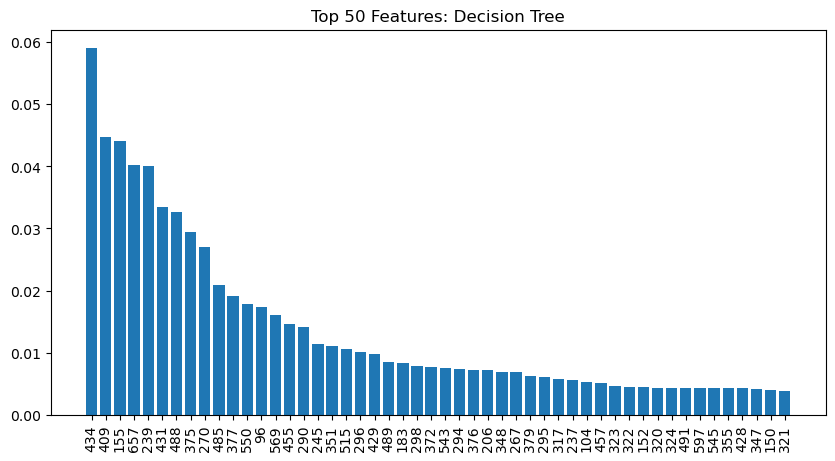

In [22]:
# Now we will extract the feature importances
feature_importances = dec_tree.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Get the names of the sorted features
names = [mnist_features.columns[i].replace('pixel', '') for i in indices]

# Number of features to display
n_features = 50

# Truncate the sorted importances and names to the top 'n_features'
truncated_importances = feature_importances[indices][:n_features]
truncated_names = names[:n_features]

# Create the plot
plt.figure(figsize=(10, 5))  # Adjust the figure size to avoid overcrowding
plt.title("Top 50 Features: Decision Tree")
plt.bar(range(n_features), truncated_importances)
plt.xticks(range(n_features), truncated_names, rotation=90)
plt.show()


<b> (d) Add unit testing for the feature ranking in both methods.<br>

<b> The test code below is commented out so that you can hit the run all button at the top of your IDE for grading

In [23]:
# import unittest

# # We will implement a unit test to ensure we get back the correct output
# class TestRankAndFitMethods(unittest.TestCase):

#     def test_rank_feature_fldr(self):
#         # Test if the output is a pandas Series
#         ranked_features_df = rank_feature_fldr(mnist_df, 'label')
#         self.assertIsInstance(ranked_features_df, pd.Series)

#         # Test if the output has the correct length
#         n_features = mnist_df.shape[1] - 1
#         self.assertEqual(len(ranked_features_df), n_features)

#     def test_fit_dec_tree_and_cross_validate(self):
#         # Test if the output is a DecisionTreeClassifier instance
#         decision_tree = fit_dec_tree(mnist_features, labels)
#         self.assertIsInstance(decision_tree, DecisionTreeClassifier)

#         # Test if cross_validate returns a numpy array
#         scores = cross_validate(decision_tree, mnist_features, labels)
#         self.assertIsInstance(scores, np.ndarray)

#         # Test if cross_validate returns the correct number of scores(k=5)
#         self.assertEqual(len(scores), 5)

# if __name__ == '__main__':
#     unittest.main()


<b> (e) Plot your decision tree graph and examine the key parameters displayed. Offer
an analysis for how the decision tree runs its predict method along with an analysis of the
runtime complexity.<br>

In [24]:
# Lets check out the node path. 
# The code/author for this block is part of the sci-kit documentation and can be found at:
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

n_nodes = dec_tree.tree_.node_count
children_left = dec_tree.tree_.children_left
children_right = dec_tree.tree_.children_right
feature = dec_tree.tree_.feature
threshold = dec_tree.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(5): # Just want to show the first 50 nodes. Make n_nodes to show all
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 6097 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 409] <= 0.5 else to node 1942.
	node=1 is a split node: go to node 2 if X[:, 434] <= 0.5 else to node 745.
		node=2 is a split node: go to node 3 if X[:, 455] <= 5.5 else to node 442.
			node=3 is a split node: go to node 4 if X[:, 323] <= 8.0 else to node 183.
				node=4 is a split node: go to node 5 if X[:, 489] <= 1.0 else to node 116.


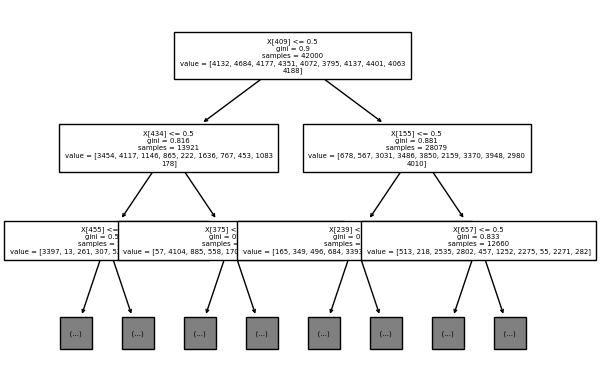

In [25]:
from sklearn import tree
# Lets plot and look at the gini as well as the number of samples in each node
tree.plot_tree(dec_tree, max_depth=2, fontsize=5) # Can change the max_depth to see more of the tree
plt.show()

Analysis: <br> A decision tree is a tree which there is a predict method which starts at the root of the tree and follows the branches based on the decision rules which are effectively if-elif statements (comparisons of feature values to thresholds) until it reaches a leaf node. In the tree the class label/output associated with the reached leaf node is then returned as the prediction for the input data. The value points will move all the way to the leaf nodes and will help to classify similar values. We see that the node values are moving in increments of 0.5 to seperate the data to the left or right child nodes with the gini/entropy value decreasing by about .1 at each level.  The runtime complexity (big-O) will depend on the number of features n and the depth d. The train time complexity for the tree will be O(n*d*log(n)) and the test time complexity will simply be O(d) since we will move from root to a leaf node to find values

<b> (f) Compare the features importances from the decision tree classifier with the feature
ranking using FLDR. Consider what sets the two methods apart and offer a discussion on the benefits of each approach.

FLDR: <br> This method measures the ratio of the between class variance to the within class variance for each feature with a higher ratio meaning higher seperability for a feature from other features. As a result this method works well with data that is relatively normal and works as a dimensionality reduction technique to extract the top features.  <br><br>
Decision Tree Classifier: <br>
This classifier calculates feature importances based on how much each feature contributes to the overall performance of the classifier model. The importance of each feature is determined by the average decrease in entropy/gini that results from splits made on that feature. Features with higher importance scores contribute more to the decision making process in the model. This makes them easy to interpret and visualise (as we see above) and works well with continuous variables. This type of classifier also handles interactions between features naturally as the tree structure implicity models these interactions. We can tune the number of leafs to control the fit of the model. These trees are effectively massive if-elif ladders to classify data points.   <br><br>
Comparison: <br>
Compared to a decison tree the FLDR is a more statistical approach that looks at the seperation between classes instead of the tree structure like in a decision tree. FLDR is less suceptable to features with more catagories when compared to decision trees because it has a more statistical approach to the seperation of classes as well. The decision tree handles non-linear relationships, and between feature interactions, where as FLDR assumes that the classes have linear seperability and doesn't account for feature interactions.<br><br>
Note: <br>
Interestingly when looking at the graphs we see that the two methods can provide similar features as pixel 434 was identified by both in the top two features. So we see that there is some correlation between the models, but there is not a ton of overlap.

-----------------------------------------------------

# Problem 2 - Machine Learning<br>
In this problem the features generated from HW2 for the numerical data set are to be used. This is
the starting point for this problem. A minimum of 5,000 observations need to be used in the problem.
A data set developed with the numericalFeatureGeneratorExample.m will also be provided if needed.
The updated data is provide as an Excel file with 42,000 observations and 60 features, 20 from each
direction. In this assignment data processing and machine learning techniques need to be combined,
the ”best” combination is determined by the best classification accuracy:<br>
1. Use a minimum of one of following data preprocessing methods (If more than one
method, the processing order is up to you. Built-ins are not allowed.):<br>
(a) Data Normalization<br>
(b) Outlier Removal<br>
(c) Feature Ranking and Selection<br>
(d) Dimensionality Reduction<br><br>
2. Use the following Machine Learning (ML) techniques (built-ins are not allowed):<br>
(a) Bayes Classifier (built-in not allowed)<br>
(b) Parzen Window (Gaussian kernel)<br>
(c) Support Vector Machine using your implementation of optimization to identify the support vectors (built-ins are not allowed)<br><br>
3. Use 5-fold cross validation on selected process from above.<br><br>
4. Provide an analysis of your results:<br>
(a)  What combination from the above methods gave the best results? The ”best
results” is considered the highest classification accuracy for the 10 digits from the 5-fold
cross validation results.<br>
(b) Was there any part of the combination of the techniques used computationally
expensive and why?

## 1a) Data Normalization

In [26]:
## Type the response for part 1 here ##
# For data preprocessing we will normalize the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# We will use the features generated from MATLAB feature generator
feature_df = pd.read_csv("Problem2Features.csv", header=None)
display(feature_df)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1,538.267964,-314.023125,443.809967,470.780028,176.561668,-336.130920,23.221391,-45.523748,-232.436917,...,-90.463868,107.934027,25.417533,-97.235438,-66.589588,22.468479,-111.476083,62.807185,74.771969,-7.480156
1,0,-238.730010,224.609513,-197.464121,23.557813,-219.122649,-223.695514,-172.689736,125.561839,-194.150108,...,44.464226,-7.825244,-5.260700,18.905444,9.593545,-40.015688,-96.469679,24.317962,-137.943930,94.025390
2,1,51.647165,-27.271305,-185.258708,-50.103687,216.830344,-207.152351,60.301310,95.431402,-117.051561,...,-12.722596,-3.039582,-26.963181,-18.563280,16.095458,-81.075489,-42.589100,52.083444,-29.080312,42.344233
3,4,110.890600,62.854265,-97.528878,-21.291295,297.976619,-32.899732,34.647964,-85.574818,-60.120835,...,23.112458,-62.558569,-115.846264,-16.405413,-37.548852,-269.649782,-130.725868,-23.526366,-20.448849,37.234782
4,0,-300.296735,152.547221,-91.949199,90.416744,-453.385929,-89.195463,-15.051828,-38.036779,-190.363654,...,-28.107534,30.400739,-47.075128,-13.092383,-85.371052,-141.450375,-36.200100,114.188444,-21.988893,-46.480710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,-345.093292,11.065646,-174.747452,326.644346,-579.877065,-56.739589,284.803065,-168.864051,-222.675505,...,253.792926,-2.276109,-76.423324,16.421357,-47.923449,-164.135483,-41.600881,58.991670,-82.371978,-254.698814
41996,1,98.457753,-141.147284,-62.981609,14.906726,237.202744,-249.597505,194.935575,50.475505,-103.460750,...,6.134738,14.508979,-14.115238,-14.021636,59.891608,-30.775038,-10.648890,22.862916,-28.956328,-35.001724
41997,7,-277.428469,15.614291,-57.528770,-361.782458,176.541830,-602.188100,161.762741,-126.375074,171.504748,...,6.213266,-108.696850,-337.164756,-122.304109,146.981833,-73.174110,124.840057,-183.646347,-63.447742,-52.520125
41998,6,-264.146701,-242.806686,-715.897321,-53.385171,275.870094,21.959704,136.165956,370.284019,-103.682699,...,-191.564370,-343.088713,6.490805,70.169534,31.228294,32.430615,-93.090557,-34.462157,-97.924401,-33.647373


In [27]:
# Now we will normalize the data
labels = feature_df.iloc[:, 0]
features = feature_df.drop([0], axis=1)

# Normalize the data`
normalized_df = (features - features.mean()) / features.std()
display(normalized_df)

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,1.386922,-0.799849,2.412655,1.862204,-0.095327,-0.733944,-1.028119,-0.722087,-0.666878,0.867563,...,-0.324098,0.787070,0.504785,-0.273335,-0.389655,0.508463,-0.426095,0.310356,0.637563,-0.110630
1,-1.054914,1.102631,-0.270602,-0.077722,-2.017388,-0.133239,-2.130272,0.257969,-0.409292,-2.064399,...,0.463732,0.080300,0.293978,0.573940,0.172146,0.024288,-0.308642,-0.002770,-1.236258,0.805240
2,-0.142359,0.212974,-0.219531,-0.397245,0.100281,-0.044854,-0.819515,0.085368,0.109412,0.051241,...,0.129824,0.109519,0.144848,0.300597,0.220093,-0.293874,0.113074,0.223114,-0.277275,0.338928
3,0.043822,0.531303,0.147553,-0.272265,0.494454,0.886120,-0.963836,-0.951517,0.492431,0.921698,...,0.339061,-0.253875,-0.465917,0.316339,-0.175498,-1.755091,-0.576760,-0.392004,-0.201240,0.292826
4,-1.248397,0.848103,0.170900,0.212294,-3.155336,0.585351,-1.243436,-0.679198,-0.383818,-2.097253,...,0.039993,0.313689,0.006648,0.340508,-0.528156,-0.761705,0.163080,0.728364,-0.214807,-0.462526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,-1.389178,0.348382,-0.175549,1.236984,-3.769775,0.758752,0.443482,-1.428636,-0.601205,0.672841,...,1.685980,0.114180,-0.195020,0.555818,-0.252004,-0.937486,0.120808,0.279315,-0.746723,-2.341248
41996,0.004750,-0.189242,0.292108,-0.115248,0.199241,-0.271625,-0.062093,-0.172160,0.200848,-0.252834,...,0.239930,0.216662,0.233133,0.333729,0.543062,0.095892,0.363065,-0.014607,-0.276183,-0.358953
41997,-1.176530,0.364448,0.314924,-1.749222,-0.095423,-2.155400,-0.248716,-1.185239,2.050763,-0.833924,...,0.240389,-0.535573,-1.986718,-0.456217,1.185295,-0.232648,1.423518,-1.694647,-0.580019,-0.517019
41998,-1.134790,-0.548309,-2.439861,-0.411479,0.387070,1.179216,-0.392718,1.659848,0.199355,0.856273,...,-0.914413,-1.966655,0.374729,0.947923,0.331688,0.585657,-0.282194,-0.480971,-0.883725,-0.346733


## (a) Bayes Classifier (built-in not allowed)

The kernel function and get_kernel function will be used for all subsequent ML Algorithms for problem 2

In [28]:
import numpy as np
import pandas as pd

# This function will calculate and return the prior probability of each class
def fit_naive_bayes(train_x, train_y):

    # Get the unique classes and their label
    # Counts is the number of times each class appears in the training data
    classes, counts = np.unique(train_y, return_counts=True)
    n_classes = len(classes)

    # Initialize matrices
    means = np.zeros((n_classes, train_x.shape[1]))
    variances = np.zeros((n_classes, train_x.shape[1]))
    priors = np.zeros(n_classes)

    # Compute the means, variances, and priors for each class
    for i, c in enumerate(classes):
        train_x_c = train_x[train_y == c] # Get the training data for class c
        means[i, :] = np.mean(train_x_c, axis=0) # axis=0 for columns
        variances[i, :] = np.var(train_x_c, axis=0) 
        priors[i] = counts[i] / len(train_y) # Get class prior probabilities

    return classes, means, variances, priors

# This function will predict the class of each sample in the test set
def predict_naive_bayes(test_x, classes, means, variances, priors):
    n_samples = test_x.shape[0] 
    probabilities = np.zeros((n_samples, len(classes))) 

    # Compute the log likelihood for each class
    for i in range(n_samples):
        for j in range(len(classes)):
            likelihood = (1 / np.sqrt(2*np.pi*variances[j])) * np.exp(-((test_x[i] - means[j])**2) / (2*variances[j]))
            probabilities[i, j] = np.log(priors[j]) + np.sum(np.log(likelihood))

    return classes[np.argmax(probabilities, axis=1)] # Return the class with the highest probability


In [29]:
# This function will calculate and return the prior probability of each class
def bayes_classifier(train_index, test_index):
    train_x, test_x = normalized_df.iloc[train_index, :].to_numpy(), normalized_df.iloc[test_index].to_numpy()
    train_y, test_y = labels.iloc[train_index].to_numpy(), labels.iloc[test_index].to_numpy()
    print("---------------------------------------------------------------")
    print("Bayes Classifier")
    print("Calculating... ")

    classes, means, variances, priors = fit_naive_bayes(train_x, train_y)
    predicted_classes = predict_naive_bayes(test_x, classes, means, variances, priors)

    correct = np.sum(predicted_classes == test_y.flatten())
    total = len(test_y)
    accuracy = correct / total * 100
    print(f'Classification accuracy: {accuracy}%')
    print("---------------------------------------------------------------")
    return accuracy

In [30]:
accuracy = bayes_classifier(train_index=range(5000), test_index=range(5000,7500))

---------------------------------------------------------------
Bayes Classifier
Calculating... 
Classification accuracy: 87.12%
---------------------------------------------------------------


## (b) Parzen Window (Gaussian kernel)

In [31]:
## We will use the kernel and get kernel functions for all of our ML Algorithms
import numpy as np
import pandas as pd

# This will define the different kernel functions
def kernel(x1, x2, kernel_name, kernel_arg):
    if kernel_name == 'linear': # Linear kernel
        k = x1.T @ x2
    elif kernel_name == 'rbf': # Radial Basis Function kernel/ Arg gamma
        squared_diff = np.sum((x1 - x2) ** 2)
        k = np.exp(-kernel_arg * squared_diff) 
    elif kernel_name == 'gaussian': # Gaussian kernel/ Arg std deviation
        squared_diff = np.sum((x1 - x2) ** 2)
        sigma = kernel_arg 
        k = np.exp(-squared_diff / (2 * sigma ** 2))
    else:
        raise ValueError(f"Invalid kernel type '{kernel_name}'")
    return k

# This will return the kernel matrix
def get_kernel(x1, x2, kernel_name, arg):
    row1 = x1.shape[0]
    row2 = x2.shape[0] 
    k = np.zeros((row1, row2))
    for i in range(row1):
        for j in range(row2):
            k[i, j] = kernel(x1[i, :], x2[j, :], kernel_name, arg)
    return k

In [32]:
# Now lets set up our train and classify functions for parzen window estimation
def get_parzen_predictions(train_x, train_y, test_x, kernel_name, kernel_arg):
    
    # Get the classes
    unique_classes = np.unique(train_y)
    class_count = len(unique_classes)

    # Initialize the predictions matrix and loop over the models
    p_all = np.zeros((len(test_x), class_count))

    # For each class, store the training data for that class
    for c in unique_classes:

        train_class = train_x[train_y == c, :] # Get the training data for class c
        count_c = train_class.shape[0] # Get class count

        p_c = np.zeros((len(test_x), 1))
        k_c = get_kernel(test_x, train_class, kernel_name, kernel_arg) # Get Kernel Estimate
        p_c = (1 / count_c) * k_c.sum(axis=1)  # Parzen window estimates
        p_all[:, c] = p_c

    return np.argmax(p_all, axis=1)

In [33]:
# This will be our parzen window classifier
def parzen_window_classifier(train_index, test_index, kernel_name, kernel_arg):
    train_x, test_x = normalized_df.iloc[train_index, :].to_numpy(), normalized_df.iloc[test_index].to_numpy()
    train_y, test_y = labels.iloc[train_index].to_numpy(), labels.iloc[test_index].to_numpy()
    
    # print(f"Train X Shape: {train_x.shape}")
    # print(f"Train Y Shape: {train_y.shape}")
    # print(f"Test X Shape: {test_x.shape}")
    # print(f"Test Y Shape: {test_y.shape}")
    print("---------------------------------------------------------------")
    print("Parzen Window Estimation")
    print("Calculating...")
    
    predicted_classes = get_parzen_predictions(train_x, train_y, test_x, kernel_name, kernel_arg)

    correct = np.sum(predicted_classes == test_y.flatten())
    total = len(test_y)
    accuracy = correct / total * 100
    print(f'Kernel:{kernel_name}\nArg:{kernel_arg}')
    print(f'Classification accuracy: {accuracy}%')
    print("---------------------------------------------------------------")
    return accuracy


In [34]:
# Usage example with a list of kernel arguments to try
list = [1] # 1 seems to be the most accurate from testing
for i in list:
    accuracy = parzen_window_classifier(train_index=range(5000), test_index=range(5000, 7500), kernel_name='gaussian', kernel_arg=i) 

---------------------------------------------------------------
Parzen Window Estimation
Calculating...
Kernel:gaussian
Arg:1
Classification accuracy: 92.92%
---------------------------------------------------------------


## (c) Support Vector Machine using your implementation of optimization to identify the support vectors (built-ins are not allowed)

In [35]:
## Type the response for part 2c (SVM) here ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxopt

# This class will train the SVM
def train_SVM(x, y, options):

    kernel_name, arg, c = options['kernel'], options['arg'], options['c']
    mu = 1e-7 # Compensates for floating point errors
    num_data = x.shape[0]
    
    K = get_kernel(x, x, kernel_name, arg)
    
    H = np.multiply(K, np.outer(y, y))
    H = H + (mu * np.eye(H.shape[0]))
        
    # Now set up the optimization problem
    P = np.outer(y,y) * H
    q = -np.ones(num_data)
    G = np.vstack([-np.eye(num_data), np.eye(num_data)])
    h = np.hstack([np.zeros(num_data), c*np.ones(num_data)])
    A = y.reshape(1,-1)
    b = np.array([0.])
    # print(f"\nP Shape: {P.shape}")
    # print(f"q Shape: {q.shape}")
    # print(f"G Shape: {G.shape}")
    # print(f"h Shape: {h.shape}")
    # print(f"A Shape: {A.shape}")
    # print(f"b Shape: {b.shape}")
    
    P = cvxopt.matrix(P, tc='d')
    q = cvxopt.matrix(q, tc='d')
    G = cvxopt.matrix(G, tc='d')
    h = cvxopt.matrix(h, tc='d')
    A = cvxopt.matrix(A, tc='d')
    b = cvxopt.matrix(b, tc='d')
    cvxopt.solvers.options['show_progress'] = False
    sol = cvxopt.solvers.qp(P, q, G, h, A, b)
    
    alpha = np.array(sol['x']).flatten() # Output validated with matlab    
    epsi = 1e-3  # This is to compensate for float point arithmatic 
    
    # Now lets get the support and boundary vector boundaries
    sv_inx = np.where(alpha > epsi)[0]
    
    boundary_inx = np.where(((c - epsi) > alpha) & (alpha > epsi))[0]

    if len(boundary_inx) > 0:
        dec_boundary = np.sum(y[boundary_inx] - 
                              (H[boundary_inx][:, sv_inx] @ 
                               (alpha[sv_inx] * y[sv_inx]))) / len(boundary_inx) 
    else:
        dec_boundary = 0
    
    prediction = K @ alpha + dec_boundary 
    temp = np.ones(num_data)
    temp[np.where(prediction < 0)] = -1 # set all values less than 0 to -1
    err = np.sum(np.abs(temp - y)) / num_data * 100
    
    model = {
        'alpha': alpha[sv_inx],
        'dec_boundary': dec_boundary,
        'options': options,
        'svX': x[sv_inx, :],
        'err': err,
        'sv_y': y[sv_inx],
        'sv_indx': np.where(sv_inx)[0],
        'numberSV': len(sv_inx)
    }

    return model

def classify_SVM(x, model):
    alpha = model['alpha']
    dec_boundary = model['dec_boundary']
    svX = model['svX']
    kernel_name = model['options']['kernel']
    arg = model['options']['arg']

    K = get_kernel(x, svX, kernel_name, arg)
    prediction = np.dot(K, alpha) + dec_boundary
    
    return prediction

In [36]:
# We will implement an SVM classifier from scratch. This classifier will be one vs all
import numpy as np
import pandas as pd
import seaborn as sns

def one_vs_all_SVM(train_index, test_index, kernel_name, kernel_arg, c):
    
    # For this implementation we will train and test on the data, and will use five fold on next iteration
    options = {'kernel': kernel_name, 'arg': kernel_arg, 'c': c}
    train_x, test_x = normalized_df.iloc[train_index, :].to_numpy(), normalized_df.iloc[test_index].to_numpy()
    train_y, test_y = labels.iloc[train_index].to_numpy(), labels.iloc[test_index].to_numpy()

    # print(f"Train X Shape: {train_x.shape}")
    # print(f"Train Y Shape: {train_y.shape}")
    # print(f"Test X Shape: {test_x.shape}")
    # print(f"Test Y Shape: {test_y.shape}")

    # Now cycle through the ten classes
    # We will do one vs all   
    predictions = []
    for i in range(10):
        temp_train_y = train_y.copy()
        for j in range(len(temp_train_y)):
            if temp_train_y[j] == i:
                temp_train_y[j] = 1
            else:
                temp_train_y[j] = -1
                
        print("---------------------------------------------------------------")
        print(f"Training SVM for digit {i}")
        model = train_SVM(train_x, temp_train_y, options)
        print(f"Training SVM for digit {i} complete")

        preds = classify_SVM(test_x, model)
        predictions.append(preds.flatten())
        
        print(f"Number of Support Vectors: {model['numberSV']}")
        print(f"Dec Boundary: {model['dec_boundary']}")
        #print(f"Support Vector: {model['SvX']}") # This will display the support vector ##############################
        
    predictions = np.array(predictions)
    predicted_classes = np.argmax(predictions, axis=0)

    # Calculate accuracy
    correct = np.sum(predicted_classes == test_y.flatten())
    total = len(test_y)
    accuracy = correct / total * 100
    print(f'\nKernel:{kernel_name}\nArg:{kernel_arg} C:{c}')
    print(f'Classification accuracy: {accuracy}%')
    print("---------------------------------------------------------------")
    return accuracy

    

In [37]:
i = .06
accuracy = one_vs_all_SVM(train_index=range(5000), test_index=range(5000, 7500), kernel_name='rbf', kernel_arg=i, c=10)

---------------------------------------------------------------
Training SVM for digit 0
Training SVM for digit 0 complete
Number of Support Vectors: 2423
Dec Boundary: -0.6266411997936175
---------------------------------------------------------------
Training SVM for digit 1
Training SVM for digit 1 complete
Number of Support Vectors: 1570
Dec Boundary: -0.9052800505703134
---------------------------------------------------------------
Training SVM for digit 2
Training SVM for digit 2 complete
Number of Support Vectors: 2506
Dec Boundary: -0.47379602395699627
---------------------------------------------------------------
Training SVM for digit 3
Training SVM for digit 3 complete
Number of Support Vectors: 2346
Dec Boundary: -0.572178804977737
---------------------------------------------------------------
Training SVM for digit 4
Training SVM for digit 4 complete
Number of Support Vectors: 2216
Dec Boundary: -0.6740198657905568
-------------------------------------------------------

In [38]:
# Can use linear kernel if you want
# accuracy = one_vs_all_SVM(train_index=range(2000), test_index=range(2000, 4000), kernel_name='linear', kernel_arg=None, c=10)

## 3. Use 5-fold cross validation (from HW 3) on selected process from above.

In [39]:
## Type the response for part 3 (5-fold cross-validation) here ##
from sklearn.model_selection import KFold

index = range(5000)

features = normalized_df.iloc[index,:]

kf = KFold(n_splits=5, random_state=50, shuffle=True)

bayes_scores = []
parzen_scores = []
svm_scores = []

for train_index, test_index in kf.split(features):
    
    bayes = bayes_classifier(train_index, test_index)
    parzen = parzen_window_classifier(train_index, test_index, kernel_name='gaussian', kernel_arg=1)
    svm = one_vs_all_SVM(train_index, test_index, kernel_name='rbf', kernel_arg=.06, c=10)
    
    bayes_scores.append(bayes)
    parzen_scores.append(parzen)
    svm_scores.append(svm)

---------------------------------------------------------------
Bayes Classifier
Calculating... 
Classification accuracy: 87.2%
---------------------------------------------------------------
---------------------------------------------------------------
Parzen Window Estimation
Calculating...
Kernel:gaussian
Arg:1
Classification accuracy: 91.9%
---------------------------------------------------------------
---------------------------------------------------------------
Training SVM for digit 0
Training SVM for digit 0 complete
Number of Support Vectors: 2088
Dec Boundary: -0.6337415051417185
---------------------------------------------------------------
Training SVM for digit 1
Training SVM for digit 1 complete
Number of Support Vectors: 1369
Dec Boundary: -0.9038196452155122
---------------------------------------------------------------
Training SVM for digit 2
Training SVM for digit 2 complete
Number of Support Vectors: 2158
Dec Boundary: -0.4868176080723887
--------------------

In [46]:
print("Five Fold Cross Validation Accuracy Scores:")
print("---------------------------------------------------------------")
print(f"Bayes Accuracy Scores: {bayes_scores}")
print(f"Bayes Accuracy Mean: {np.mean(bayes_scores)}%")
print("---------------------------------------------------------------")
print(f"Parzen Accuracy Scores: {parzen_scores}")
print(f"Parzen Accuracy Mean: {np.mean(parzen_scores): .2f}%")
print("---------------------------------------------------------------")
print(f"SVM Accuracy Scores: {svm_scores}")
print(f"SVM Accuracy Mean: {np.mean(svm_scores)}%")

Five Fold Cross Validation Accuracy Scores:
---------------------------------------------------------------
Bayes Accuracy Scores: [87.2, 87.3, 88.6, 87.7, 89.7]
Bayes Accuracy Mean: 88.1%
---------------------------------------------------------------
Parzen Accuracy Scores: [91.9, 91.7, 91.8, 91.5, 92.4]
Parzen Accuracy Mean:  91.86%
---------------------------------------------------------------
SVM Accuracy Scores: [83.7, 85.6, 87.1, 85.6, 84.3]
SVM Accuracy Mean: 85.26%


## 4. Provide an analysis of your results:
(a) [2.5 points] What combination from the above methods gave the best results? The ”best
results” is considered the highest classification accuracy for the 10 digits from the 5-fold
cross validation results.<br>
(b) [2.5 points] Was there any part of the combination of the techniques used computationally
expensive and why?

A) The method that returns the best result appears to be the parzen window estimation at 91.86%. Bayes Classifier was the second most accurate with 88% overall. The SVM came in last, and with further hyperparamater tuning it is possible that the accuracy of the SVM classifier could be made higher than the bayes or parzen window. I attempted to fine tune the hyperparamaters (gamma and c) for the SVM, by looping through a list of values (took me like 8 hours of searching I shouldn't have spent so much time), and even with the best hyperparamaters that I could find it does not perform as well as the parzen window algorithm or the bayes classifier. I am sure with further searching I would be able to tune in the SVM, but generally the parzen window seems to be the best option due to ease of implementation and the speed.<br><br>
B) The SVM was by far the most computationally expensive which lines up with what we see during the computation code and the mathematics. The calculation of the support vectors is extremely computationally expensive and results in the long delay. Not only that, but it is a binary classification algorithm so by performing one vs all we have to iterate over the ten different classes. This along with the support vector calculation massively slows down computation time. I would use a built in for future use of SVM or would write the algorithm in a faster programming language. The parzen window and bayes classifiers are both relatively efficient in comparison to the SVM. The parzen window has to compute the kernel function like the SVM which can be computationally expensive since the kernel function calculates the distance between pairs of samples. Overall the bayes is the fastest algorithm. 


-----------------------------------------

# Problem 3 - Game Theory (Search Algorithms)<br>
In the tic-tac-toe code provided add the following method to allow an unbeatable AI in your game.
Implement either MiniMax or Alpha Beta to play against and allow the play to choose the skill level.<br>
1. Best Move (Provided) - Skill Level Easy<br>
2. Utility Based Agent and Goal Based Agent (PA1) - Skill Level Medium<br>
3. Skill Level Hard - Implemented the MiniMax and Alpha Beta algorithm from the
Game Theory document for the tic-tac-toe game. You will need to alter the provided pseudo
code to input the game board.

In [44]:
## Type the response for Problem 3 here, or use the separate file in the tic-tac-toe folder ##
# The code below should also run from the folder, but I wanted to display the code here as well
from player import Player
from board import Board

# Represents a brute-force minimax agent
class MinimaxPlayer(Player):

    # Initialize the player
    def __init__(self, player_number):
        super().__init__(player_number)

    # Returns the next move given the current board state
    def get_next_move(self, board: Board) -> int:
        _, best_move = self.get_minimax(board, True) # Get the best (max) move
        return best_move

    # Recursively determine the best move for the current player 
    # I opted to go with one function to match the unit test, but could split into max and min value functions
    # The only modification to the test file is adding results[0] to only get the best move value
    def get_minimax(self, state: Board, is_max: bool):
        if state.has_win(self.mark) or state.has_win(self.opponent_mark) or state.is_full():
            return self.get_score(state), None
        else:
            if is_max: # Max_Value
                v = -10
                best_move = None
                for space in state.get_open_spaces():
                    next_state = state.copy()
                    next_state.mark_space(space, self.mark)
                    v2, _ = self.get_minimax(next_state, False)
                    if v2 > v:
                        v, best_move = v2, space
                return v, best_move
            else: # Min_Value
                v = 10 
                best_move = None
                for space in state.get_open_spaces():
                    next_state = state.copy()
                    next_state.mark_space(space, self.opponent_mark)
                    v2, _ = self.get_minimax(next_state, True) 
                    if v2 < v:
                        v, best_move = v2, space
                return v, best_move

    # Returns the score for the given board state
    def get_score(self, state: Board):
        if state.has_win(self.mark):
            return 10
        elif state.has_win(self.opponent_mark):
            return -10
        else:
            return 0

In [ ]:
## The only modification to this test class from canvas original was adding results[0] 
import unittest
from minimax_player import MinimaxPlayer
from board import Board
from parameterized import parameterized


class MinimaxPlayerTests(unittest.TestCase):

    @parameterized.expand([
        ["XXOOOXX-X", 7],
        ["X-OOO-X-X", 7],
        ["O-XX--XOO", 4],
        ["OOX-X-OX-", 3],
        ["X-----O--", 1],
        ["---------", 0]
    ])
    def test_get_next_move(self, state, expected):
        board = Board(state)
        player = MinimaxPlayer(1)
        result = player.get_next_move(board)
        self.assertEqual(expected, result)

    def test_get_next_move_2(self):
        board = Board("XOXOOX-X-")
        player = MinimaxPlayer(2)
        result = player.get_next_move(board)
        self.assertEqual(8, result)

    # The only change to this test from original on canvas was result[0]
    @parameterized.expand([
        ["XXOOOXXOX", 0],
        ["XXX------", 10],
        ["OOO------", -10]
    ])
    def test_get_minimax_for_base_case(self, state, expected):
        board = Board(state)
        player = MinimaxPlayer(1)
        result = player.get_minimax(board, True)
        self.assertEqual(expected, result[0])
    
    # The only change to this test from original on canvas was result[0]
    @parameterized.expand([
        ["XXOOOXX-X", True, 10],
        ["X-OOOXX0X", True, 0],
        ["XXOOO-X-X", False, -10]
    ])
    def test_get_minimax_for_recursive_case(self, state, is_max, expected):
        board = Board("XXOOO-X-X")
        player = MinimaxPlayer(1)
        result = player.get_minimax(board, False)
        self.assertEqual(-10, result[0])

    @parameterized.expand([
        ["---------", 0],
        ["XXX------", 10],
        ["OOO------", -10]
    ])
    def test_get_score(self, state, expected):
        board = Board(state)
        player = MinimaxPlayer(1)
        result = player.get_score(board)
        self.assertEqual(expected, result)


if __name__ == '__main__':
    unittest.main()